In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('AttendanceMarksSA.csv')

In [5]:
df.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


In [6]:
df.shape

(73, 3)

In [7]:
df.describe()

,Attendance,MSE,ESE
count,73.000000,73.000000,73.000000
mean,81.698630,9.780822,46.630137
std,9.506847,3.047069,6.617542
min,62.000000,3.000000,32.000000
25%,75.000000,8.000000,42.000000
50%,80.000000,10.000000,47.000000
75%,90.000000,11.000000,50.000000
max,98.000000,17.000000,64.000000


In [8]:
df.isnull().sum()

Attendance    0
MSE           0
ESE           0
dtype: int64

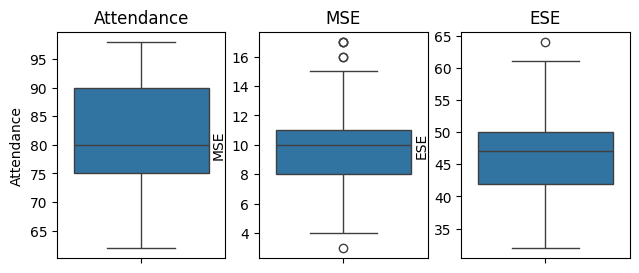

In [9]:
plt.figure(figsize=(10,10))
p=1
for i in df.columns:
    plt.subplot(3,4,p)
    sns.boxplot(df[i])
    plt.title(i)
    p+=1
plt.show()

In [10]:
for i in df.columns:
    a=np.mean(df[i])
    a=a.round(2)
    b=np.median(df[i])
    print(i,'== Mean:',a,'Median:',b)

Attendance == Mean: 81.7 Median: 80.0
MSE == Mean: 9.78 Median: 10.0
ESE == Mean: 46.63 Median: 47.0


In [11]:
x=df['MSE']
y=df['ESE']

In [29]:
x

0     10
1      7
2      3
3     16
4      9
      ..
68    10
69     8
70     9
71    11
72    12
Name: MSE, Length: 73, dtype: int64

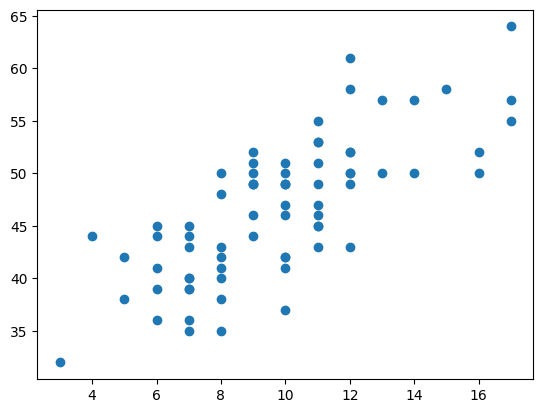

In [12]:
plt.scatter(x,y)

In [30]:
def gradient_descent(x,y):
    m_curr=b_curr=0
    iterations=10000
    n=len(x)
    a=[]
    b=[]
    learning_rate=0.009
    for i in range(iterations):
        y_pridected=m_curr*x+b_curr
        cost=(1/n)*sum([val**2 for val in (y-y_pridected)])
        md=-(2/n)*sum(x*(y-y_pridected))
        bd=-(2/n)*sum(y-y_pridected)
        m_curr=m_curr-learning_rate*md
        b_curr=b_curr-learning_rate*bd
        #a[cost]=i
        a.append(cost)
        b.append(b_curr)
        print(f'm={m_curr} b={b_curr} cost={cost} iteration={i}')

    return a,b

a,b=gradient_descent(x,y)

ValueError: Data must be 1-dimensional, got ndarray of shape (73, 73) instead

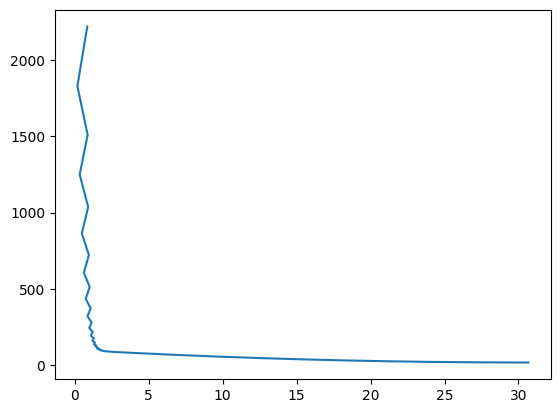

In [14]:
plt.plot(b,a)

In [17]:
x_line=[min(x),max(x)]
y_line=[1.6321521129102268*xi + 30.666347387962162 for xi in x_line]

In [18]:
y_hat=1.6321521129102268*x + 30.666347387962162

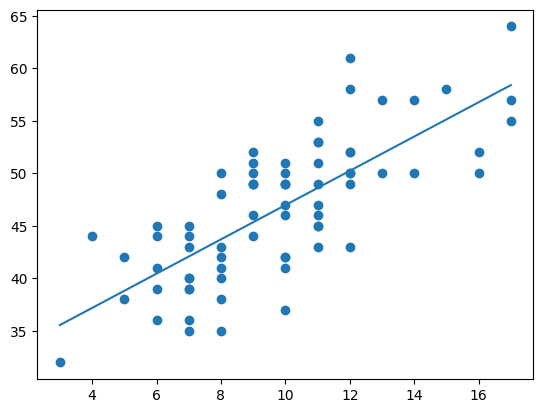

In [19]:
plt.scatter(x,y)
plt.plot(x_line,y_line)

In [20]:
import math
def RSE(y_true, y_predicted):

    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse


rse= RSE(df['ESE'],y_hat)
print(rse)

4.396224549648049


In [21]:
print(x)

0     10
1      7
2      3
3     16
4      9
      ..
68    10
69     8
70     9
71    11
72    12
Name: MSE, Length: 73, dtype: int64


In [22]:
from sklearn.linear_model import LinearRegression

X = np.array(df['MSE']).reshape(-1,1)
y = np.array(df['ESE']).reshape(-1,1)

In [31]:
X

array([[10],
       [ 7],
       [ 3],
       [16],
       [ 9],
       [11],
       [ 7],
       [10],
       [ 8],
       [ 8],
       [ 8],
       [12],
       [ 4],
       [ 7],
       [15],
       [12],
       [ 6],
       [ 9],
       [10],
       [ 7],
       [13],
       [ 5],
       [ 8],
       [12],
       [17],
       [11],
       [10],
       [16],
       [17],
       [12],
       [11],
       [13],
       [11],
       [10],
       [ 7],
       [ 6],
       [ 9],
       [ 9],
       [12],
       [11],
       [ 6],
       [ 7],
       [14],
       [12],
       [10],
       [14],
       [ 5],
       [ 6],
       [11],
       [ 9],
       [ 9],
       [ 8],
       [ 9],
       [ 6],
       [10],
       [17],
       [11],
       [11],
       [10],
       [ 8],
       [ 7],
       [ 7],
       [10],
       [11],
       [ 7],
       [12],
       [ 8],
       [10],
       [10],
       [ 8],
       [ 9],
       [11],
       [12]])

In [23]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [24]:
print(model.coef_)
print(model.intercept_)

[[1.63215164]]
[30.66635246]


In [26]:
y_pridected=model.predict(X)

In [28]:
RSE(y,y_pridected)

4.396224549647786